In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import re
import math
from subprocess import run
from matplotlib.lines import Line2D

In [2]:
# this code is written so that pretty much everything ends up in one directory:
dir_path = "/Users/kd16230/Documents/Enceladus"

# choose which named discontinuities (.nd) file to run TauP with
model_name = "CadekEPSCBrantutW2"
mod_file = f"{dir_path}/{model_name}.nd"

# let python know where the TauP install is
TauP_install = "/Users/kd16230/Software/TauP-2.5.1"

# choose epicentral distances (degrees) for the simulation (list can be any length)
distance_list = ["30","120"]

# set source depth (km)
source_depth = "2.0"

# point to .txt list of phases you want TauP to simulate
phase_list = f"{dir_path}/plotphases.txt"

In [15]:
# set up empty dict to store path.gmt file paths for each distance
path_file = {}

# run TauP_path at each epicentral distance
for distance in distance_list:
    path_file[distance] = f"{dir_path}/{model_name}{distance}path.gmt"
    run([f'{TauP_install}/bin/taup_path', '-mod', mod_file, '-h', source_dep, '-pf', phase_list, '-deg', distance, '-o', path_file[distance]])

In [16]:
def Read_Phase_List(file_name):
    print(file_name)
    with open(file_name, 'r') as data:
        for line in data:
            line = line.replace('\n','')
            phases = line.split(",")
            
    return phases

In [17]:
def Read_vel_mod(file_name): #this will currently break if the .nd model file has spaces at the start of each line
    print(file_name)
    with open(file_name, 'r') as data:
        dep = []
        vp = []
        vs = []
        rho = []
        for line in data:
            try :
                float(line[0])
                p = line.split()
                dep.append(float(p[0]))
                vp.append(float(p[1]))
                vs.append(float(p[2]))
                rho.append(float(p[3]))
            except :
                pass
        
        bounds = []
        print(dep)
        for i in range(0,(len(dep)-1)) :
            if dep[i] == dep[i+1] :
                bounds.append(float(dep[i]))
        r = max(dep)
            
    return dep, vp, vs, rho, bounds, r

In [18]:
def Read_Taup_Path(file_name, dphases): # dphases to check against what's come out
    print(file_name)
    with open(file_name, 'r') as data:
        x = []
        y = []
        break_list = []
        line_number = -1
        placeholder = []
        for line in data:
            line_number += 1
            if '>' in line: #if it's a header line
                placeholder = line.split(" ")
                break_list.append((line_number, re.sub(r"\([^()]*\)", "", placeholder[1])))
                x.append(float(-1))
                y.append(float(-1))
            else :
                p = line.split()
                x.append(math.radians(float(p[0])))
                y.append(float(p[1]))
                
        break_list.append((-1, 'End'))
        break_list = np.array(break_list)
        if(set(dphases).issubset(set(break_list[:-1,1]))) :
            print("Phase lists match.")
        else :
            print("! Phase lists do not match.")
            print(break_list[:-1,1])
            print(dphases)
            
        radians = {}
        radius = {}
        colours = {}
        for i in range(0, len(break_list[:,0])-1) :
            phase = break_list[i,1]
            phase2 = break_list[i,1]
            if phase in break_list[:i,1] :
                phase2 = phase + str(np.count_nonzero(break_list[:i,1]==phase))
            print(phase2)
            radians[phase2] = x[(int(break_list[i,0])+1):int(break_list[i+1,0])]
            radius[phase2] = y[(int(break_list[i,0])+1):int(break_list[i+1,0])]
            for j in range(0, len(dphases)) :
                if dphases[j] == phase :
                    colours[phase2] = f"C{j}"
        print(radians.keys())  
        print(colours)
        titlelist = placeholder[19:27]
        titlelist = [t.replace('\n', '') for t in titlelist]
        title = " ".join(titlelist)
        print(title)

    return radians.keys(), radians, radius, title, colours

In [19]:
# read in the phases requested from TauP
input_phases = Read_Phase_List(phase_list)
print(input_phases)

# read in the velocity model file
dep, vp, vs, rho, bounds, r = Read_vel_mod(mod_file)

# detect and check layer interface depths
print(bounds)

/Users/kd16230/Documents/Enceladus/plotphases.txt
['PcP', 'PKikKiKP', 'PKIKP', 'PKIIKP']
/Users/kd16230/Documents/Enceladus/Cadek16Enc/CadekEPSCBrantutW2.nd
[0.0, 0.41, 0.41, 1.63, 2.86, 4.08, 5.31, 6.53, 7.75, 8.98, 10.2, 11.43, 12.65, 13.88, 15.1, 16.33, 17.55, 18.78, 20.0, 20.0, 69.6, 69.6, 69.65, 78.55, 87.69, 96.82, 105.95, 115.09, 124.22, 133.36, 142.49, 151.62, 160.76, 169.89, 179.03, 188.16, 197.29, 206.43, 215.56, 224.7, 233.83, 242.97, 252.1]
[0.41, 20.0, 69.6]


In [20]:
# set up dicts to collect TauP results - each key contains the results for a different epicentral distance

phases = {}
radians = {}
radius = {}
title = {}
colours = {}

for distance in distance_list:
    phases[distance], radians[distance], radius[distance], title[distance], colours[distance] = Read_Taup_Path(path_file[distance], input_phases)

/Users/kd16230/Documents/Enceladus/Cadek16Enc/CadekEPSCBrantutW230path.gmt
! Phase lists do not match.
['PcP' 'PKikKiKP' 'PKIIKP']
['PcP', 'PKikKiKP', 'PKIKP', 'PKIIKP']
PcP
PKikKiKP
PKIIKP
dict_keys(['PcP', 'PKikKiKP', 'PKIIKP'])
{'PcP': 'C0', 'PKikKiKP': 'C1', 'PKIIKP': 'C3'}
2.0 km deep source in the CadekEPSCBrantutW2 model
/Users/kd16230/Documents/Enceladus/Cadek16Enc/CadekEPSCBrantutW2120path.gmt
! Phase lists do not match.
['PKIKP' 'PKIIKP' 'PKIIKP' 'PKIIKP']
['PcP', 'PKikKiKP', 'PKIKP', 'PKIIKP']
PKIKP
PKIIKP
PKIIKP1
PKIIKP2
dict_keys(['PKIKP', 'PKIIKP', 'PKIIKP1', 'PKIIKP2'])
{'PKIKP': 'C2', 'PKIIKP': 'C3', 'PKIIKP1': 'C3', 'PKIIKP2': 'C3'}
2.0 km deep source in the CadekEPSCBrantutW2 model


In [23]:
# some dictionaries defining how phases are drawn and labelled

colours={"SKiKS":"orange",
        "PcP":"#00c0c0",
        "PKIKP":"magenta",
        "PKIKP1":"magenta",
        "PKIKP2":"magenta",
        "PKIIKP":"green",
        "PKIIKP1":"green",
        "PKIIKP2":"green",
        "PKikKiKP":"orange"
        }

# this dict converts between TauP nomenclature and the terms used to describe phases on icy ocean worlds (e.g. Stähler et al 2017, Dapré & Irving 2024)
sphases = {"SKiKS":"SFoFS",
          "PcP":"PeP",
          "PcPPcP":"PeP2",
          "PcPPcPPcP":"PeP3",
          "ScSScS":"SeS2",
          "ScSScSScS":"SeS3",
          "PcPPcPPcP1":"PeP3_1", 
          "PKIKP":"PFPFP",
          "PKIKP1":"PFPFP1",
          "PKIKP2":"PFPFP2",
          "pPKIKP":"pPFPFP",
          "pPKIKP1":"pPFPFP1",
          "PKikKiKP":"P(Fof)\N{SUBSCRIPT ONE}FoFP",
          "PKikKiKP1":"P(Fof)\N{SUBSCRIPT ONE}FoFP1",
          "PKikKIKP":"P(Fof)\N{SUBSCRIPT ONE}FPFP",
          "PKikKIKP1":"P(Fof)\N{SUBSCRIPT ONE}FPFP1",
          "PKikKIKP2":"P(Fof)\N{SUBSCRIPT ONE}FPFP2",
          "PKikKIKP3":"P(Fof)\N{SUBSCRIPT ONE}FPFP3",
          "PKikKikKIKP":"P(Fof)\N{SUBSCRIPT TWO}FPFP",
          "PKikKikKIKP1":"P(Fof)\N{SUBSCRIPT TWO}FPFP1",
          "S":"S",
          "P":"P",
          "SS":"SS",
          "PP":"PP",
          "ScS":"SeS",
          "ScP":"SeP",
          "PcS":"PeS",
          "PKiKP":"PFoFP",
          "PKIIKP":"PFPPFP",
          "PKIIKP1":"PFPPFP1",
          "PKIIKP2":"PFPPFP2",
          "PKikKIIKP":"P(FoF)\N{SUBSCRIPT ONE}FPPFP",
          "PKikKIIKP1":"P(FoF)\N{SUBSCRIPT ONE}FPPFP1",
          "PKikKIIKP2":"P(FoF)\N{SUBSCRIPT ONE}FPPFP2",
          "PKJKP":"PFSFP",
          "PKJKP1":"PFSFP1",  
          "SKJKS":"SFSFS",
          "SKIIKS":"SFPPFS",
          "SKIIKS1":"SFPPFS1",
          "SKIIKS2":"SFPPFS2",
          "SKIKS":"SFPFS",
          "SKIKS1":"SFPFS1",
          "SKJKS1":"SFSFS1",
          "PcPPKIKP":"(PeP)\N{SUBSCRIPT ONE}PFPFP",
          "PcPPKIKP1":"(PeP)\N{SUBSCRIPT ONE}PFPFP1",
          "SKikKiKS":"S(Fof)\N{SUBSCRIPT ONE}FoFS",
          "SKikKiKS1":"S(Fof)\N{SUBSCRIPT ONE}FoFS1",
          "SKikKIKS":"S(Fof)\N{SUBSCRIPT ONE}FPFS",
          "SKikKIKP":"S(Fof)\N{SUBSCRIPT ONE}FPFP",
          "SKikKIKP1":"S(Fof)\N{SUBSCRIPT ONE}FPFP1",
          "SKikKIIKP":"S(Fof)\N{SUBSCRIPT ONE}FPPFP",
          "SKikKIIKP1":"S(Fof)\N{SUBSCRIPT ONE}FPPFP1",
          "SKikKIIKP2":"S(Fof)\N{SUBSCRIPT ONE}FPPFP2",
          "SKikKIKS1":"S(Fof)\N{SUBSCRIPT ONE}FPFS1",
          "SKikKikKIKS":"S(Fof)\N{SUBSCRIPT TWO}FPFS",
          "SKikKikKIKS1":"S(Fof)\N{SUBSCRIPT TWO}FPFS1"}

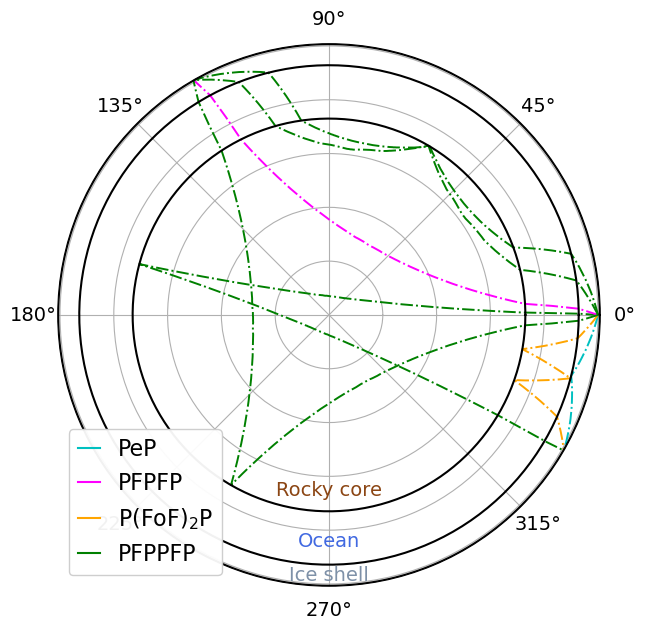

In [49]:
### plot results ###
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

for distance in distance_list:
    for phase in phases[distance]:
        if distance == '30':
# factor of -1 plots the results at 30 degrees on the other hemisphere for clarity
            ax.plot((np.array(radians[distance][phase])*(-1)), radius[distance][phase], label=sphases[phase], color=colours[phase],
                linewidth=1.4,linestyle="-.")
        else:
            ax.plot((radians[distance][phase]), radius[distance][phase], label=sphases[phase], color=colours[phase],
                linewidth=1.4,linestyle="-.")

### plot planet boundaries ###

# generate datapoints for circles
thetamin = 360
thetamax = 0
circle = np.linspace(thetamin, thetamax, 300)
length = len(circle)

# retrieve boundaries from velocity model
boundaries = []
for bound in bounds:
    boundaries.append(r-bound)

func = lambda length, bound : [bound]*length

circle = np.radians(circle)
    
for bound in boundaries:
    ax.plot(circle, func(length, bound), 'k')

ax.set_thetamin(thetamin)
ax.set_thetamax(thetamax)
ax.set_rmax(max(max(radius[distance].values())))

### formatting ###
ax.set_rgrids(np.linspace(0.,250,6),fontsize=12)
ax.set_thetagrids(np.linspace(0.,thetamin,4),fontsize=12)
#ax.text(np.radians(-3),ax.get_rmax()/3.,' Radius (km)',
#        rotation=0,ha='center',va='center',fontsize=14)
ax.text(np.radians(270),242,'Ice shell',
        rotation=0,ha='center',va='center',fontsize=14,color='#7e91a8')
ax.text(np.radians(270),210,'Ocean',
        rotation=0,ha='center',va='center',fontsize=14,color='royalblue')
#ax.text(np.radians(270),172,'Upper core',
#        rotation=0,ha='center',va='center',fontsize=13,color='peru')
ax.text(np.radians(270),163,'Rocky core',
        rotation=0,ha='center',va='center',fontsize=14,color='saddlebrown')
ax.tick_params(axis='y', rotation = 0, colors='gray',labelsize=14,labelleft=False,labelright=True,direction='in')
ax.tick_params(axis='x',labelsize=14)

ax.set_xticks(np.pi/180. * np.linspace(0,360,8,endpoint=False))
ax.tick_params(axis='x', which='major', pad=7)

fig.set_size_inches(7,10)
plt.legend(loc="lower left", fontsize='16')

# manual legend creation
legend_elements = []
for phase in ['PcP','PKIKP','PKikKiKP','PKIIKP']:
    legend_elements.append(Line2D([0],[0], color=colours[phase],label=sphases[phase]))
ax.legend(handles=legend_elements,handlelength=1,loc='lower left',fontsize='16',framealpha=0.95)

#plt.xticks(fontsize='12')
plt.grid(True)
plt.show()